In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
Ecuador_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]

In [5]:
Ecuador_df_ind2.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [6]:
ts = Ecuador_df_ind2['Value'] 
ts1 = Ecuador_df_ind2[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,20.487
2015-01-01,20.487
2014-01-01,20.781
2013-01-01,21.070
2012-01-01,21.354


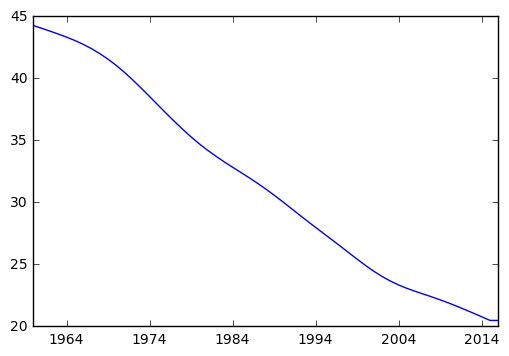

In [7]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


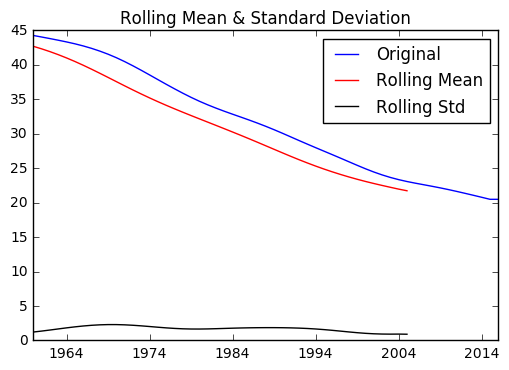

Results of Dickey-Fuller Test:
Test Statistic                  1.247277
p-value                         0.996297
#Lags Used                      3.000000
Number of Observations Used    53.000000
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
Critical Value (1%)            -3.560242
dtype: float64


In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

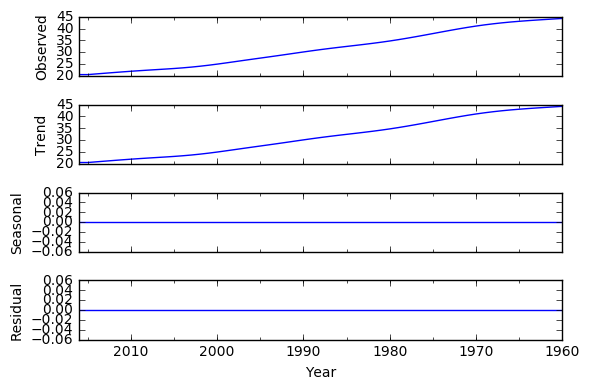

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [10]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

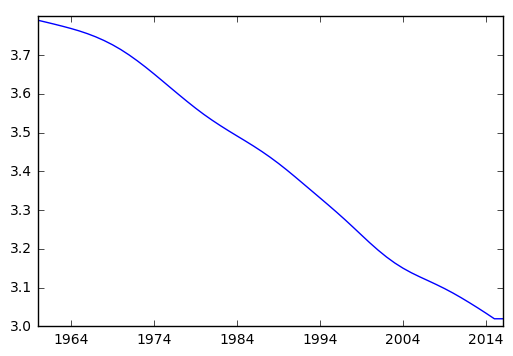

In [11]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


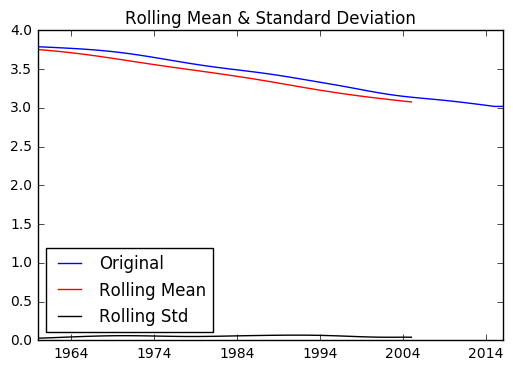

Results of Dickey-Fuller Test:
Test Statistic                 -1.973253
p-value                         0.298422
#Lags Used                     11.000000
Number of Observations Used    45.000000
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
Critical Value (1%)            -3.584829
dtype: float64


In [12]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [50]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


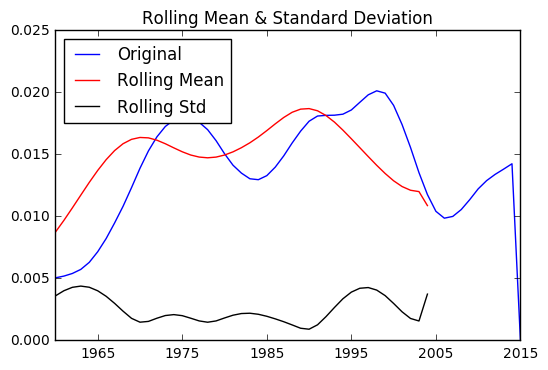

Results of Dickey-Fuller Test:
Test Statistic                 -5.294398
p-value                         0.000006
#Lags Used                      2.000000
Number of Observations Used    53.000000
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
Critical Value (1%)            -3.560242
dtype: float64


In [51]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [15]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


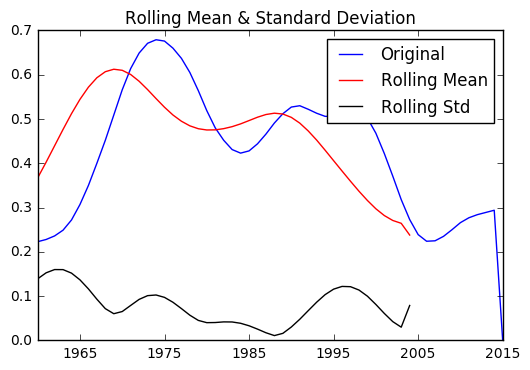

Results of Dickey-Fuller Test:
Test Statistic                 -1.312632
p-value                         0.623374
#Lags Used                      3.000000
Number of Observations Used    52.000000
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
Critical Value (1%)            -3.562879
dtype: float64


In [16]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [17]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=57)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=57,adjust=True,ignore_na=False,min_periods=0).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


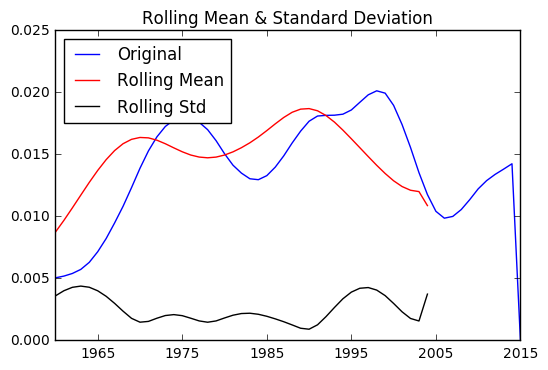

Results of Dickey-Fuller Test:
Test Statistic                 -5.294398
p-value                         0.000006
#Lags Used                      2.000000
Number of Observations Used    53.000000
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
Critical Value (1%)            -3.560242
dtype: float64


In [18]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

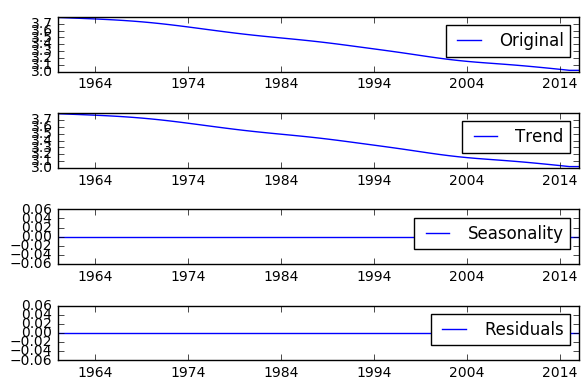

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [84]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

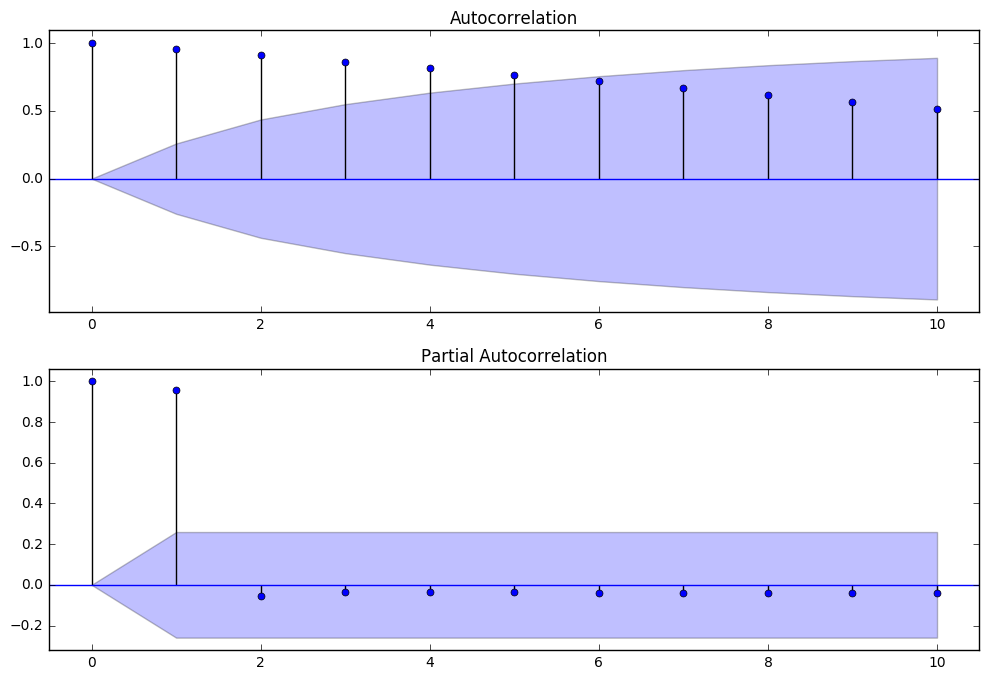

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

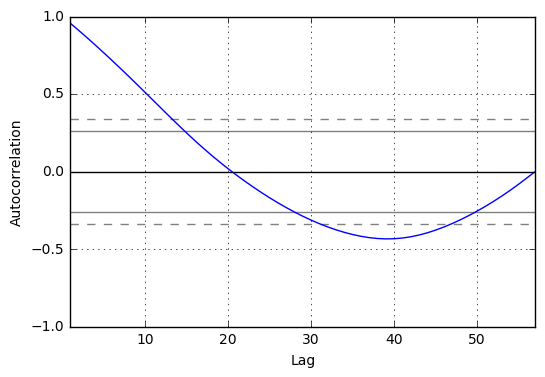

In [86]:
autocorrelation_plot(ts1_log)
plt.show()

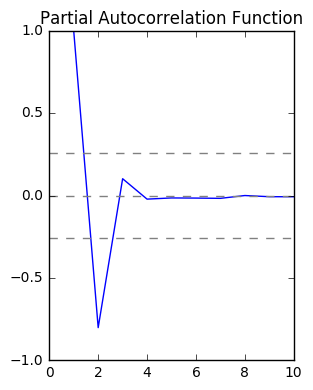

In [87]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [88]:
sm.tsa.arma_order_select_ic(ts1_log, max_ar=4, max_ma=2, ic='aic')

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:492: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:494: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\pri

{'aic':             0           1           2
 0    8.147064  -62.518858 -130.337502
 1 -308.575201 -378.594098 -439.494458
 2 -526.089830         NaN -357.186039
 3         NaN         NaN         NaN
 4         NaN         NaN         NaN, 'aic_min_order': (2, 0)}

In [89]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [90]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [91]:
def AR_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 2
Coefficients: const          3.44887
ar.L1.Value    1.98630
ar.L2.Value   -0.98889
dtype: float64
2006-01-01    22.851277
Freq: -1AS-JAN, dtype: float64
-526.0898302379716


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


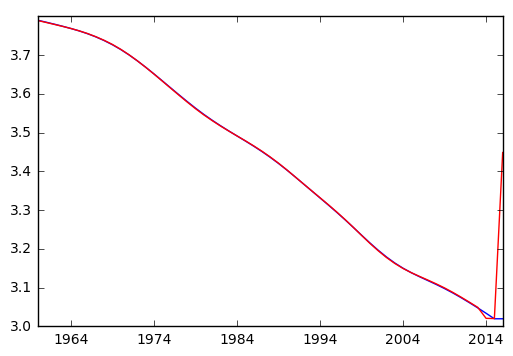

In [93]:
model_AR = AR_Model(ts1_log)

In [97]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 1))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 4))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          3.419918
ma.L1.Value    0.999955
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 1)   Log Likelihood                  34.259
Method:                       css-mle   S.D. of innovations              0.128
Date:                Fri, 18 Aug 2017   AIC                            -62.519
Time:                        00:14:56   BIC                            -56.390
Sample:                    01-01-2016   HQIC                           -60.137
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.4199      0.034    101.727      0.000         3.354     3.486
ma.L1.Value     1.0000      0.043     23.151

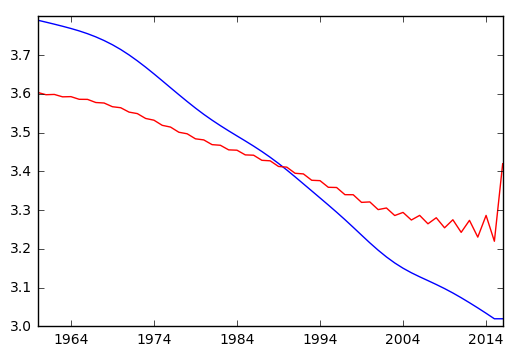

In [98]:
model_MA = MA_Model(ts1_log)

In [103]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 1))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const          3.44887
ar.L1.Value    1.98630
ar.L2.Value   -0.98889
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 0)   Log Likelihood                 267.045
Method:                       css-mle   S.D. of innovations              0.002
Date:                Fri, 18 Aug 2017   AIC                           -526.090
Time:                        00:15:33   BIC                           -517.918
Sample:                    01-01-2016   HQIC                          -522.914
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.4489      0.097     35.710      0.000         3.260     3.638
ar.L1.Value     1.9863 

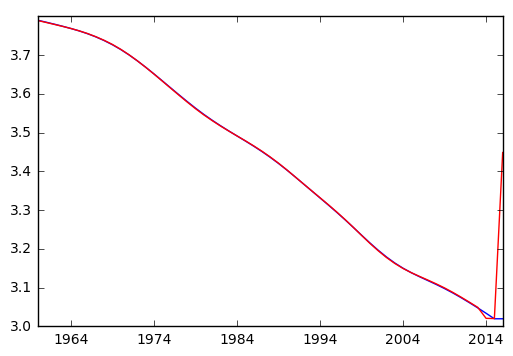

In [104]:
model_Combined = Combined_Model(ts1_log)

In [105]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2, 0, 0))


In [106]:
aic_metric

,AIC,Modelname
0,-516.373499,"ARIMA(ts, order=(2, 0, 0))"
0,-526.089830,"ARIMA(ts, order=(2, 0, 0))"
0,-62.518858,"ARIMA(ts, order=(0, 0, 4))"
0,-62.518858,"ARIMA(ts, order=(0, 0, 4))"
0,-516.373499,"ARIMA(ts, order=(2,0, 1))"
0,-526.089830,"ARIMA(ts, order=(2,0, 1))"


In [36]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output = np.exp(output)
    return output

In [120]:
forecast(model_Combined,5)
#print('RMSE: %.4f'% np.sqrt(sum((out-ts1.Value)**2)/len(ts1)))

array([ 44.45231676,  44.59343065,  44.69304535,  44.75108901,  44.76771314])

In [121]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    PredictedVal =  np.exp(fittedVal)
    print('Predicted existing values are:')
    return PredictedVal
FittedValues(model_Combined)
#ccc

Predicted existing values are:


Year
2016-01-01    31.464815
2015-01-01    20.498447
2014-01-01    20.509773
2013-01-01    21.098532
2012-01-01    21.381931
2011-01-01    21.660338
2010-01-01    21.929724
2009-01-01    22.184074
2008-01-01    22.417403
2007-01-01    22.636796
2006-01-01    22.851277
2005-01-01    23.073849
2004-01-01    23.327542
2003-01-01    23.634408
2002-01-01    23.997431
2001-01-01    24.421633
2000-01-01    24.894841
1999-01-01    25.408940
1998-01-01    25.944682
1997-01-01    26.475824
1996-01-01    26.995550
1995-01-01    27.501046
1994-01-01    27.998530
1993-01-01    28.503189
1992-01-01    29.021989
1991-01-01    29.551791
1990-01-01    30.088521
1989-01-01    30.610962
1988-01-01    31.106156
1987-01-01    31.574301
1986-01-01    32.013480
1985-01-01    32.433822
1984-01-01    32.844338
1983-01-01    33.261041
1982-01-01    33.698900
1981-01-01    34.170881
1980-01-01    34.677889
1979-01-01    35.234987
1978-01-01    35.843101
1977-01-01    36.488039
1976-01-01    37.155680
1975-01-01 

In [81]:
'''
def normal(predictions_ARIMA_diff):
    predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
    predictions_ARIMA_log = pd.Series(ts1_log.ix[0], index=ts1_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    plt.plot(ts1)
    plt.plot(predictions_ARIMA)
    final = pd.Series(ts1)
    plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-final)**2)/len(ts1)))
    return predictions_ARIMA